##Autocorrelation

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/AirPassengers.csv',index_col='Month',parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


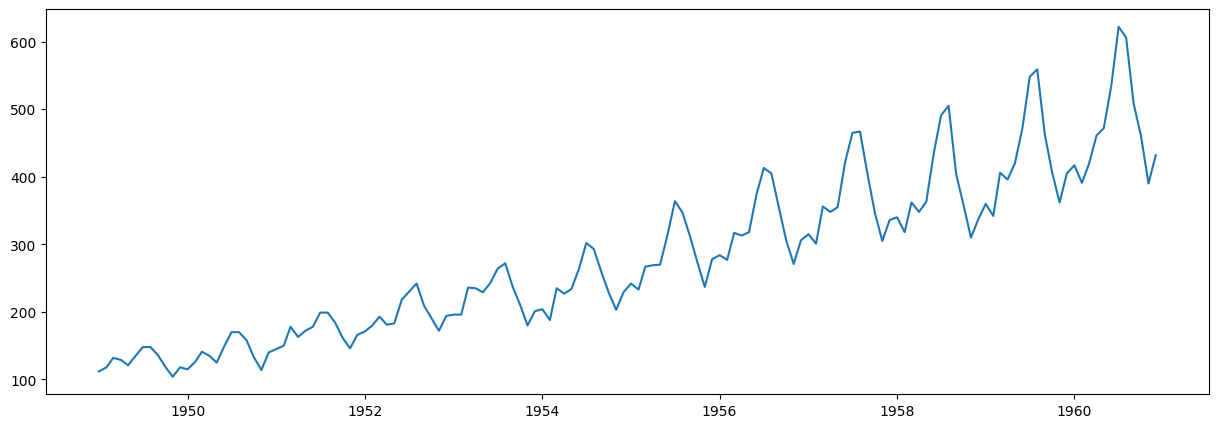

In [3]:
plt.figure(figsize=(15,5))
plt.plot(df)

In [4]:
df['Passengers_Diff']=df['Passengers'].diff(periods=1)
df

,Passengers,Passengers_Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [5]:
df=df.dropna()

In [6]:
df

,Passengers,Passengers_Diff
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


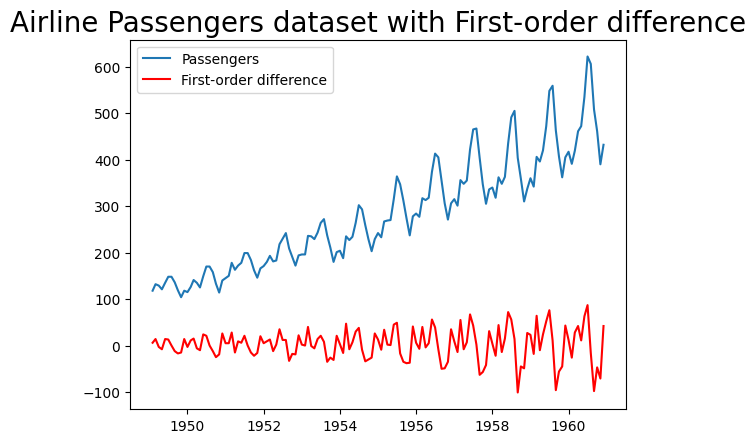

In [7]:
plt.title('Airline Passengers dataset with First-order difference',size=20)
plt.plot(df['Passengers'],label='Passengers')
plt.plot(df['Passengers_Diff'],label='First-order difference',color='red')
plt.legend()

In [9]:
acf_values=acf(df['Passengers_Diff'])
np.round(acf_values,2)

array([ 1.  ,  0.3 , -0.1 , -0.24, -0.3 , -0.09, -0.08, -0.09, -0.29,
       -0.19, -0.1 ,  0.28,  0.83,  0.28, -0.11, -0.22, -0.23, -0.06,
       -0.07, -0.09, -0.3 , -0.16])

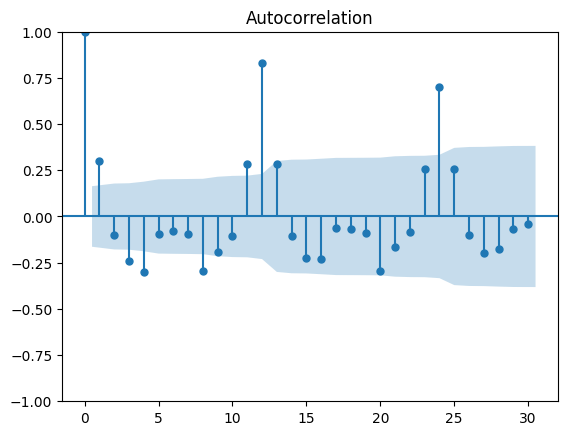

In [10]:
plot_acf(df['Passengers_Diff'],lags=30);

##Partial Autocorrelation Function

In [11]:
pacf_values=pacf(df['Passengers_Diff'])
np.round(pacf_values,2)

array([ 1.  ,  0.3 , -0.22, -0.16, -0.23,  0.01, -0.2 , -0.16, -0.49,
       -0.28, -0.67, -0.42,  0.61, -0.05, -0.3 ,  0.02,  0.14,  0.09,
       -0.12,  0.01, -0.22, -0.12])

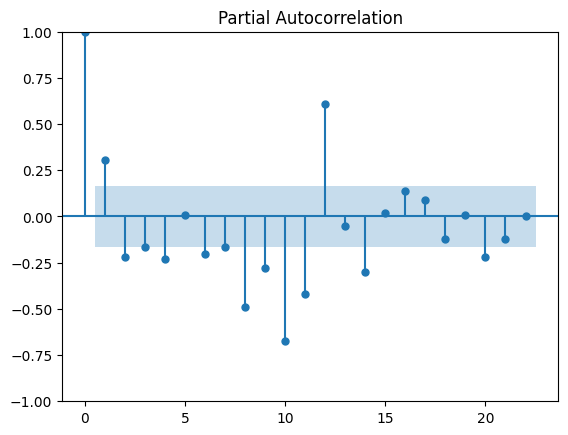

In [13]:
plot_pacf(df['Passengers_Diff']);